In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [7]:
# Task 1
def laguerre(t, n, beta=2, sigma=4):
    if beta > sigma or beta < 0:
        raise ValueError("Wrong beta and omega")
    l_0 = np.sqrt(sigma) * (np.exp(-beta * t / 2))
    l_1 = np.sqrt(sigma) * (1 - sigma * t) * (np.exp(-beta * t / 2))
    if n == 0:
        return l_0
    elif n == 1:
        return l_1
    l_next = (3 - t * sigma) / 2 * l_1 - 0.5 * l_0
    for j in range(3, n+1):
        l_0 = l_1
        l_1 = l_next
        l_next = (2 * j - 1 - t * sigma) / j * l_1 - (j - 1) / j * l_0
    return l_next


laguerre(2, 3)

-3.3382703198364467

In [25]:
# Task2
def tabulate_laguerre(n, T, beta, sigma):
    steps = np.linspace(0, T, 100)
    res = laguerre(steps, n, beta,sigma)
    res_df = pd.DataFrame({"tab": steps, "result": res})
    return res_df


In [ ]:
 tabulate_laguerre(10, 2, 2, 4)

In [87]:
# Task 3
def experiment(beta=2, sigma=4, eps=0.001):
    N = 20
    t = 0
    while True:
        t += 0.001
        res = []
        flag = True
        for i in range(N):
            val = abs(laguerre(t, i, beta, sigma))
            if val > eps:
                flag = False
                break
            res.append(val)
        if flag:
            return t, pd.DataFrame({"n": range(N), "res": res})

    return t, pd.DataFrame({"n": range(N), "res": res})

In [88]:
result, df = experiment()

In [89]:
result

75.47599999999633

In [90]:
df

,n,res
0,0,3.328279e-33
1,1,1.001492e-30
2,2,1.496734e-28
3,3,1.481221e-26
4,4,1.091932e-24
5,5,6.395443e-23
6,6,3.099857e-21
7,7,1.278825e-19
8,8,4.583536e-18
9,9,1.449828e-16


In [38]:
# Task 4
def rects_integral(f, T, N=1000):
    step = T / N
    integral = 0
    
    for i in range(N):
        t = i * step
        integral += f(t) * step
        
    return integral

In [39]:
f1= lambda t: np.exp(-2*t**3/3)
print(rects_integral(f1, 100,100))
print(rects_integral(f1, 100,10000))
print(rects_integral(f1, 100, 1000))
print(rects_integral(f1, 500, 250))

1.5182450842564033
1.0272063651460819
1.072205809646119
2.009655899987663


In [44]:
# Task 5
def laguerre_transformation(f, n, T, beta=2, sigma=4):
    alpha = beta - sigma
    integrand = lambda t: f(t) * laguerre(t, n) * np.exp(-t*alpha)
    result = rects_integral(integrand, T)
    return result

In [46]:
def f(t):
    if 0 <= t <= 2 * np.pi:
        return np.sin(t - np.pi / 2) + 1
    elif t > 2 * np.pi:
        return 0

In [47]:
def tab_transformation(f, T, N=20, beta=2, sigma=4):
    t = range(1, N+1)
    results = [laguerre_transformation(f, n, T, beta, sigma) for n in t]
    return results

In [49]:
tab_transformation(f, 100, 20, 2, 4)

[-8648.14274788252,
 65007.3353502825,
 -295193.96748519485,
 881176.0132820922,
 -1749863.3178164058,
 2164977.6385332244,
 -1199033.6512635474,
 -653136.834782406,
 1244219.5560655487,
 137740.00257016378,
 -993643.3938406411,
 -152891.23688149534,
 776700.9220859677,
 350949.3581898745,
 -504570.1548950228,
 -535257.3547505615,
 124687.34268273099,
 532314.2621925117,
 263758.6160539734,
 -258313.24496453727]

In [51]:
# Task6
def reverse_laguerre_transformation(lst, t, beta=2 , sigma=4):
    return sum([lst[i] * laguerre(t, i, beta, sigma) for i in range(len(lst))])

In [52]:
def f_t(t):
    return t

In [53]:
lst = [1,2,3,4,5]
reverse_laguerre_transformation(lst, 10)

28.306704873810098

In [55]:
# Task 7
def plot_laguerre(T, N, beta=2, sigma=4):
    fig = plt.figure(figsize=(10, 10))
    ax = fig.gca()
    for n in range(N+1):
        values = tabulate_laguerre(n, T, beta, sigma)
        ax.plot(values['tab'], values['result'], label=f"n={n}")
    ax.set_xlabel("t")
    ax.set_ylabel("l(t)")
    fig.legend(loc='lower center', ncol=4)
    plt.show()

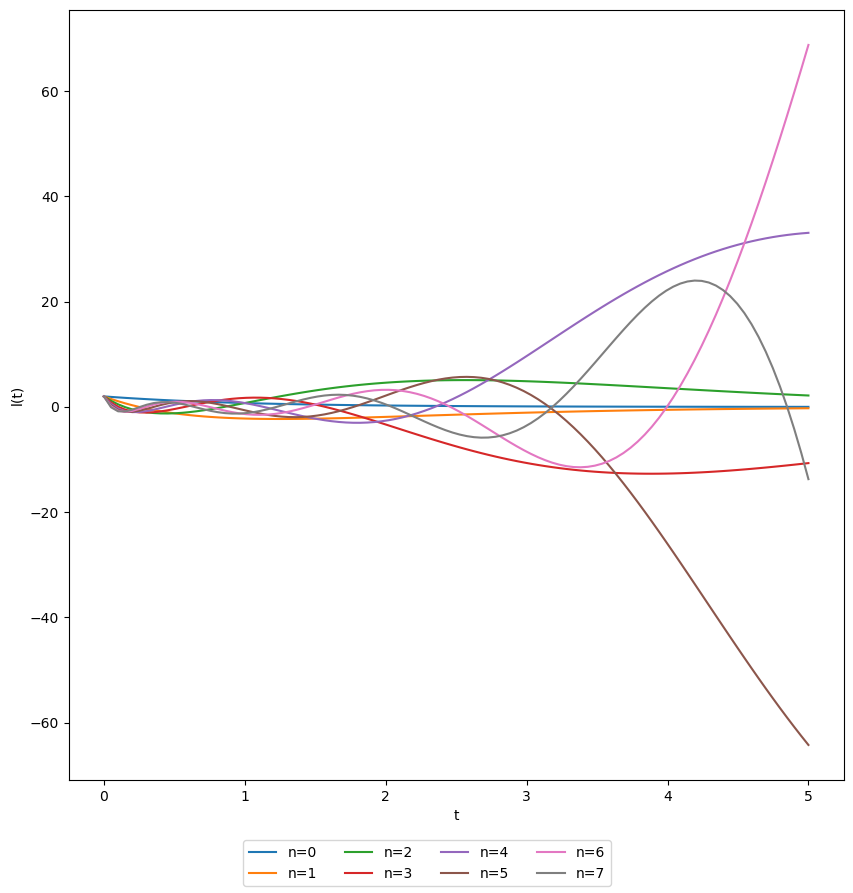

In [56]:
plot_laguerre(5, 7)

In [62]:
# Task 8
def plot_transformation(f, n, T, beta=2, sigma=4):
    fig = plt.figure(figsize=(10, 10))
    ax = fig.gca()
    values = tab_transformation(f, T, n, beta, sigma)
    ax.bar(range(1, n+1), values)

    ax.set_xlabel("n")
    ax.set_ylabel("f_n")
    ax.set_title("Laguerre Transformation")
    plt.axhline(0, color='black')
    plt.show()

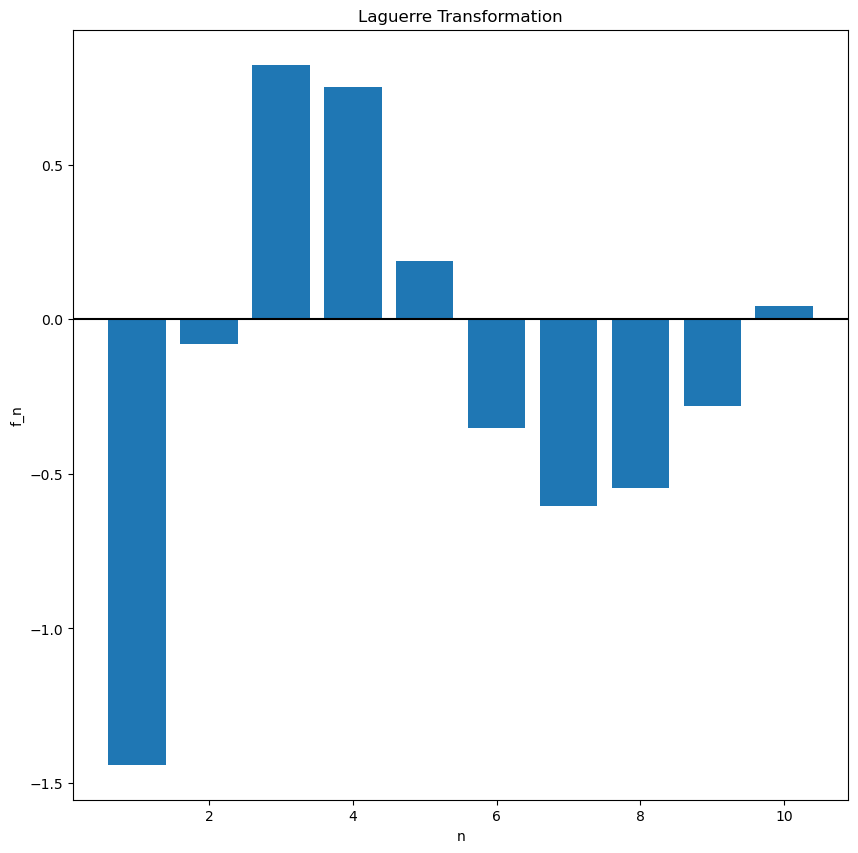

In [63]:
plot_transformation(f, 10, 1)

In [80]:
def plot_tranformations(f, n, T, beta=2, sigma=4, t1=0, t2=2*np.pi):
    transform_values = tab_transformation(f, T, n, beta, sigma)

    reversed_transform_values = [reverse_laguerre_transformation(transform_values, t, beta, sigma) for t in np.linspace(t1, t2, 1000)]

    fig = plt.figure(figsize=(10, 10))
    ax = fig.subplots(2, 1)
    ax[0].bar(range(1, n+1), transform_values, alpha=0.7, edgecolor='black')
    ax[0].set_xlabel("n")
    ax[0].set_ylabel("f_n")
    ax[0].set_title("Transformation coefs")
    ax[0].set_xticks(range(1, n+1))
    fig.tight_layout()
    ax[0].axhline(0, color='black')

    ax[1].plot(np.linspace(t1, t2, 1000), reversed_transform_values, alpha=0.7, linewidth=2.0)
    ax[1].set_xlabel("t")
    ax[1].set_ylabel("f(t)")
    ax[1].set_title("Reversed transformation")

    plt.show()

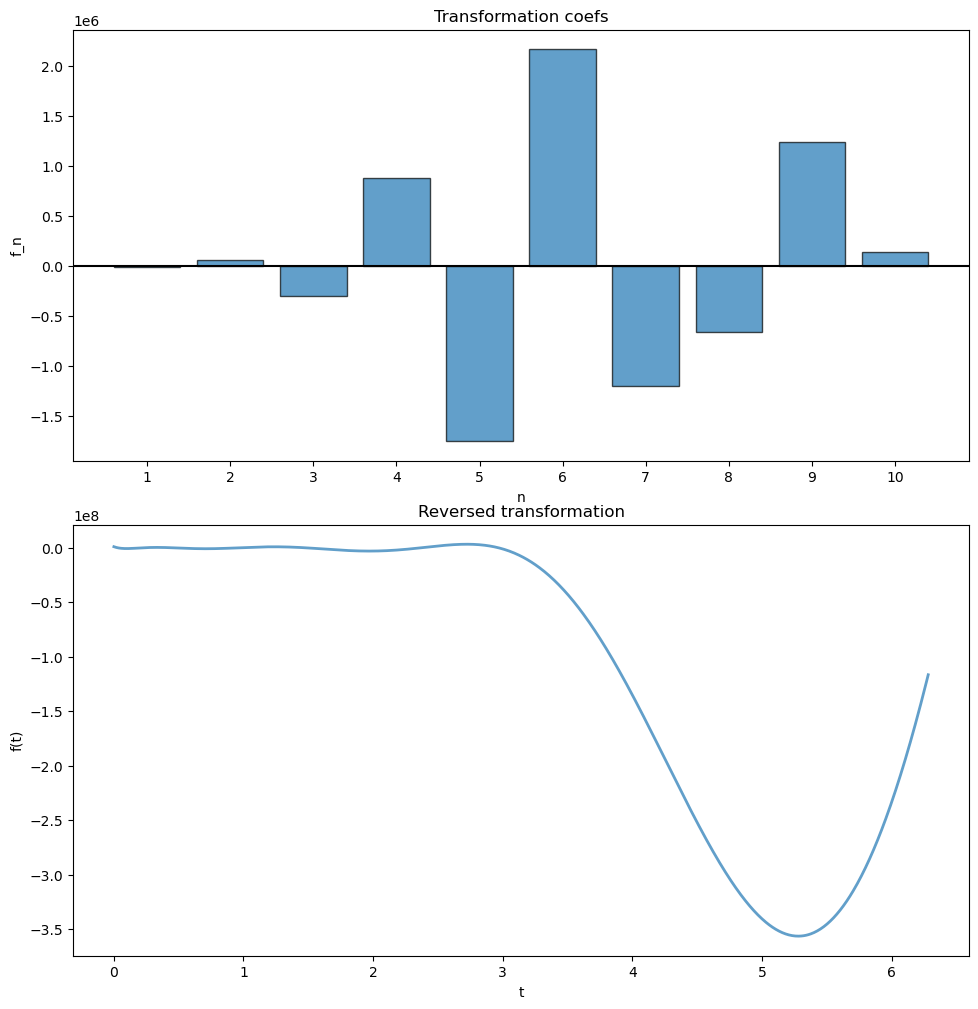

In [82]:
plot_tranformations(f, 10, 10)